BLOOD DATA ANALYSIS 

In [3]:
#importing libraries for reading and writing basic operations
import pandas as pd
import numpy as np

#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing libraries for splitting model into test set and training set
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score




In [4]:
#filter unwannted warnings
import warnings
warnings.simplefilter("ignore")

In [5]:
#importing all the required models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [7]:
train=pd.read_csv("blood-train.csv")
test=pd.read_csv("blood-test.csv")

In [8]:
#printing train and test size
print("Train shape:" , train.shape)
print("Test shape:", test.shape)

Train shape: (576, 6)
Test shape: (200, 5)


In [9]:
#printing first 5 data set
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [10]:
#counting ppl who have donated and not donated blood in march 2007
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [11]:
y=train.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [12]:
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [13]:
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]


In [14]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [15]:
df=pd.merge(train,test)

In [16]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [17]:
x=df.iloc[:,:]
x.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


DATA EXPLORATION

In [18]:
#statistics of data
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

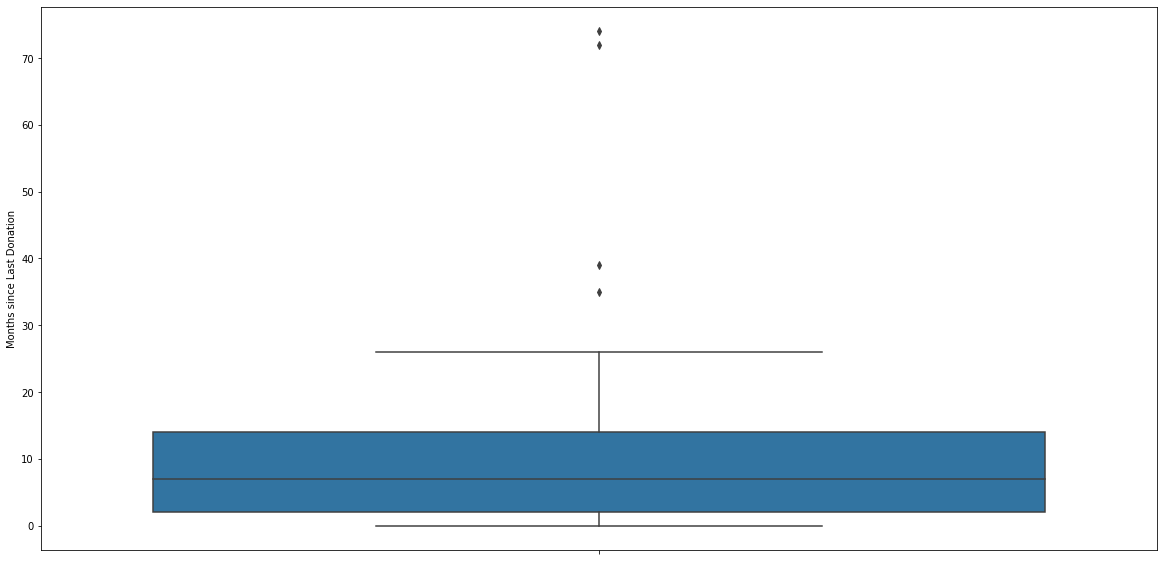

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(y="Months since Last Donation",data=old_train)

In [23]:
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

In [24]:
#Creating new variable for calculating number of times  a person has donated blood
x["Donating for"]=(x["Months since First Donation"]-x["Months since Last Donation"])

In [25]:
x.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#fitting and transforming data
x=scale.fit_transform(x)

In [28]:
train=x[:576]

In [29]:
train.shape

(576, 5)

In [30]:
test=x[576:]

In [31]:
y=y[:576]

In [32]:
y.shape

(576,)

In [33]:
#model building
#splitting dataset into train set and data set
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.2,random_state=0)

In [37]:
#logistic regression model
logreg=LogisticRegression(random_state=7)
#fitting model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [38]:
#predicting on test data
pred=logreg.predict(xtest)

In [39]:
accuracy_score(pred,ytest)


0.7155172413793104

In [40]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [42]:
#SVM Model
SVMC=SVC(probability=True)

SVMC.fit(train,y)

SVC(probability=True)

In [43]:
#predicting test data
pred=SVMC.predict(xtest)

In [44]:
accuracy_score(pred,ytest)

0.7844827586206896

In [45]:
#printing confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [46]:
roc_auc_score(pred,ytest)

0.8429487179487177

In [47]:
#random forest
RFC=RandomForestClassifier()
#fitting model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [48]:
#predicting test data
pred=RFC.predict(xtest)


In [49]:
confusion_matrix(pred,ytest)

array([[79, 25],
       [ 2, 10]], dtype=int64)

In [51]:
accuracy_score(pred,ytest)

0.7672413793103449

In [52]:
roc_auc_score(pred,ytest)

0.796474358974359

In [54]:
#decision tree
#building model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)


In [55]:
#fitting model
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [56]:
pred=model.predict(xtest)

In [57]:
accuracy_score(pred,ytest)

0.7327586206896551

In [58]:
confusion_matrix(pred,ytest)

array([[80, 30],
       [ 1,  5]], dtype=int64)

In [59]:
roc_auc_score(pred,ytest)

0.7803030303030304

In [62]:
#MLP Classifier-multilayer perciptron classifier

#building model
clf_neural=MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_sizes=(25,),random_state=1)

clf_neural.fit(train,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [63]:
#predicting from fitted data set
print("Predicting test data")
predicted=clf_neural.predict(xtest)


Predicting test data


In [64]:
confusion_matrix(predicted,ytest)


array([[80, 24],
       [ 1, 11]], dtype=int64)

In [65]:
roc_auc_score(pred,ytest)

0.7803030303030304

In [66]:
accuracy_score(pred,ytest)

0.7327586206896551